In [1]:
import pandas as pd
import numpy as np
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'loss')

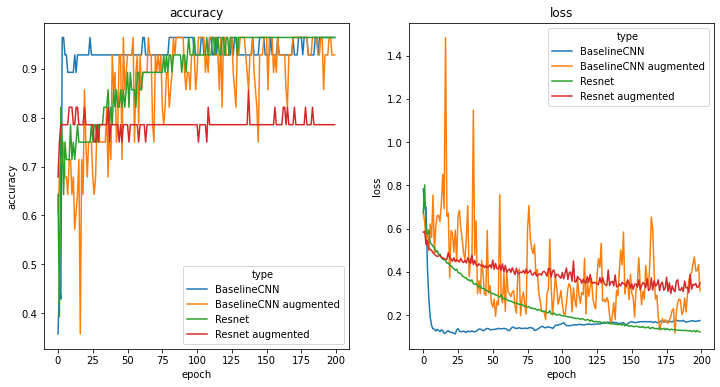

In [4]:
def get_metrics(path):
    accumulator = EventAccumulator(path)
    accumulator.Reload()

    loss = [e.value for e in accumulator.Scalars("val_loss")]
    acc = [e.value for e in accumulator.Scalars("val_acc")]
    return loss, acc

models = {
    "BaselineCNN": "lightning_logs/baseline_no_augmentation", 
    "BaselineCNN augmented": "lightning_logs/baseline_with_augmentation", 
    "Resnet": "lightning_logs/resnet_no_augmentation", 
    "Resnet augmented": "lightning_logs/resnet_with_augmentation"
}
df_acc = pd.DataFrame()
df_loss = pd.DataFrame()
for name, path in models.items():
    loss, acc = get_metrics(path)
    df_acc[name] = acc
    df_loss[name] = loss

df_acc = df_acc.reset_index().melt("index", var_name="type", value_name="accuracy").rename(columns={"index": "epoch"})
df_loss = df_loss.reset_index().melt("index", var_name="type", value_name="loss").rename(columns={"index": "epoch"})
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=df_acc, x="epoch", y="accuracy", hue="type").set_title("accuracy")
plt.subplot(1, 2, 2)
sns.lineplot(data=df_loss, x="epoch", y="loss", hue="type").set_title("loss")